**Importing necessary libraries**

In [13]:
import numpy as np
import os
import cv2 
import keras
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

**Importing Data**

In [2]:
categories = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

In [3]:
data_path = 'Dataset/leapGestRecog/leapGestRecog'

image_data = []

for dr in os.listdir(data_path):
    for category in categories:
        class_index = categories.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (64, 64)), class_index])
            except Exception as e:
                print(e)

In [4]:
image_data[0]

[array([[5, 6, 4, ..., 3, 4, 4],
        [4, 5, 6, ..., 3, 4, 2],
        [4, 6, 4, ..., 2, 3, 4],
        ...,
        [5, 6, 6, ..., 8, 6, 5],
        [5, 5, 4, ..., 5, 5, 5],
        [4, 6, 5, ..., 4, 5, 4]], dtype=uint8),
 0]

In [5]:
random.shuffle(image_data)

In [6]:
input_data = []
label = []
for x, y in image_data:
    input_data.append(x)
    label.append(y)

**Data Visualization**

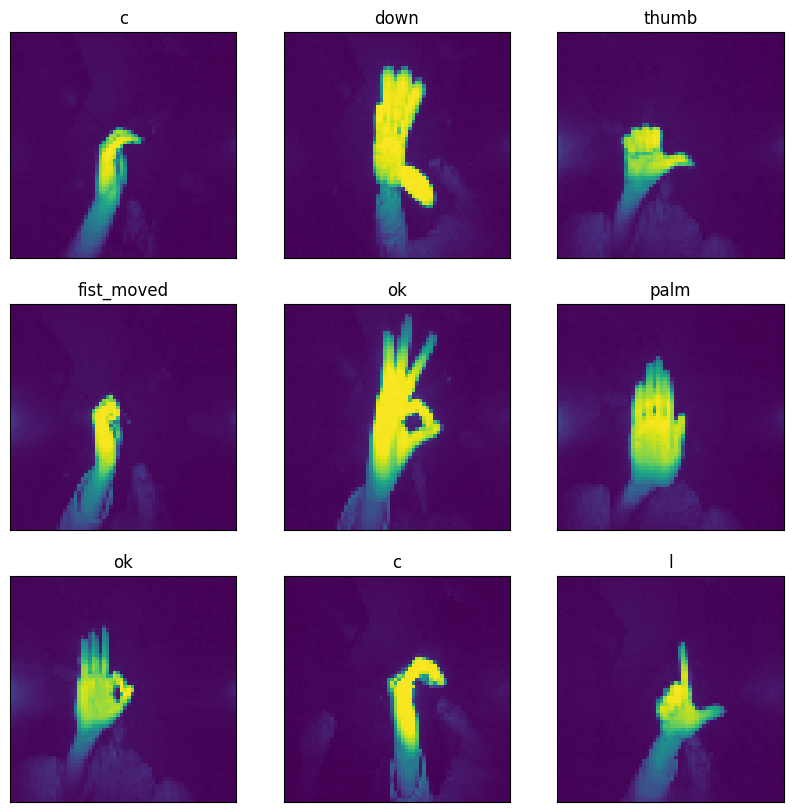

In [7]:
plt.figure(1, figsize = (10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(input_data[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])
plt.show()

**Data scaling**

In [8]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 64, 64)

**Train Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

**Model**

In [14]:
model = keras.models.Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), input_shape = [64, 64, 1], activation = 'relu'),
    
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Dropout(0.3),

    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    MaxPool2D(pool_size = (2, 2)),
    Dropout(0.3),

    Flatten(),

    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Model Training**

In [18]:
model.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/5
438/438 [==============================] - 140s 319ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 2/5
438/438 [==============================] - 174s 396ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 3/5
438/438 [==============================] - 112s 255ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 3.7051e-04 - val_accuracy: 0.9998
Epoch 4/5
438/438 [==============================] - 159s 364ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 6.7800e-04 - val_accuracy: 0.9998
Epoch 5/5
438/438 [==============================] - 96s 219ms/step - loss: 6.1253e-05 - accuracy: 1.0000 - val_loss: 2.0258e-04 - val_accuracy: 0.9998


**Model Save**

In [20]:
model.save('hand_gesture_classifier.keras')